In [1]:
## install packages

install.packages(c('lmerTest', 'MuMIn', 'VIF'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
## Load packages

library(lmerTest)
library(MuMIn)
library(VIF)
library(car)
library(ggplot2)

Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:VIF’:

    vif




In [3]:
## Utility function for colinearity analysis

vif.mer <- function (fit) {
  ## adapted from rms::vif
  
  v <- vcov(fit)
  nam <- names(fixef(fit))
  
  ## exclude intercepts
  ns <- sum(1 * (nam == "Intercept" | nam == "(Intercept)"))
  if (ns > 0) {
    v <- v[-(1:ns), -(1:ns), drop = FALSE]
    nam <- nam[-(1:ns)]
  }
  
  d <- diag(v)^0.5
  v <- diag(solve(v/(d %o% d)))
  names(v) <- nam
  v
}

In [4]:
## We load and show some of the data from the dataset.

filename <- 'pred_data.csv'

analysisData <- read.csv(file=filename, header=TRUE, sep=",")

summary(analysisData)

      Pig            Evit         Cu          Litter          Start      
 Min.   :4601   Evit000:276   Cu000:274   Min.   : 1.00   Min.   :15.00  
 1st Qu.:4857   Evit100:286   Cu035:300   1st Qu.: 5.00   1st Qu.:23.80  
 Median :5866   Evit200:299   Cu175:287   Median :11.00   Median :25.70  
 Mean   :6238                             Mean   :12.14   Mean   :25.67  
 3rd Qu.:8050                             3rd Qu.:20.00   3rd Qu.:27.30  
 Max.   :8442                             Max.   :24.00   Max.   :35.40  
                                                                         
     Weight            Feed             Time       
 Min.   : 15.00   Min.   :  3.30   Min.   : 1.000  
 1st Qu.: 38.30   1st Qu.: 32.80   1st Qu.: 3.000  
 Median : 59.20   Median : 74.50   Median : 6.000  
 Mean   : 60.73   Mean   : 80.73   Mean   : 6.481  
 3rd Qu.: 81.20   3rd Qu.:123.00   3rd Qu.: 9.000  
 Max.   :117.00   Max.   :224.50   Max.   :12.000  
                  NA's   :72                

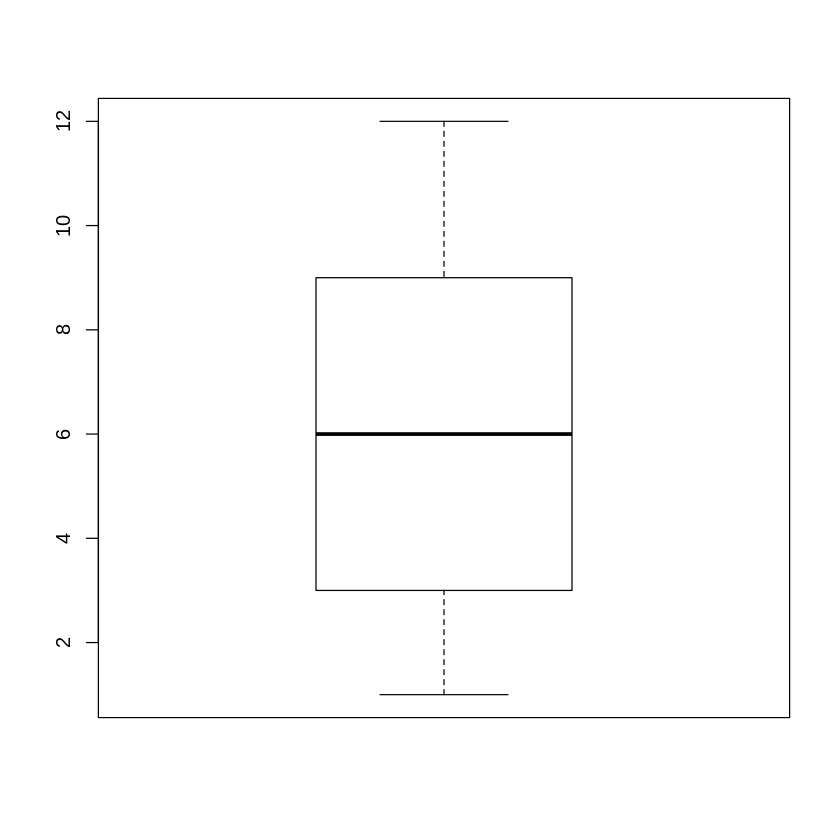

In [5]:
boxplot(analysisData$Time)

# In this case there are not much outliers, if there would be outliers we would 
# first have to log scale this data by doing
#
# analysisData$Time = log(analysisData$Time)
#

In [15]:
## We make a model where the dependent variable weight is predicted by time, with a random effect taken into account for each individual pig

model = lmer(Weight ~ 
            Time + 
            (1|Pig),
          data= analysisData, 
          REML=FALSE)

## Print the model output

summary(model)

print("RSquared:")

r.squaredGLMM(model)

print("VIF:")

vif.mer(model)

print("Anova:")

anova(model)


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: Weight ~ Time + (1 | Pig)
   Data: analysisData

     AIC      BIC   logLik deviance df.resid 
  4813.9   4832.9  -2402.9   4805.9      857 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.7145 -0.5702 -0.0940  0.4883  4.7748 

Random effects:
 Groups   Name        Variance Std.Dev.
 Pig      (Intercept) 39.82    6.310   
 Residual             11.35    3.369   
Number of obs: 861, groups:  Pig, 72

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)  15.72352    0.78294  84.33256   20.08   <2e-16 ***
Time          6.94251    0.03337 789.03911  208.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
     (Intr)
Time -0.276

[1] "RSquared:"


R2m,R2c
0.9178735,0.9817808


[1] "VIF:"


Time 
   1

[1] "Anova:"


,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Time,491488.7,491488.7,1,789.0391,43293.39,0
